In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import both of the data files
city_data = 'Resources/city_data-Copy1.csv'
ride_data = 'Resources/ride_data-Copy1.csv'

city = pd.read_csv(city_data)
ride = pd.read_csv(ride_data)

# Drop the duplicates (This will fix the error that keeps occuring in your bubble plot code)
city = city.drop_duplicates('city', keep = 'first')

# Merge the two sets together
merge_data = city.merge(ride, on = 'city')

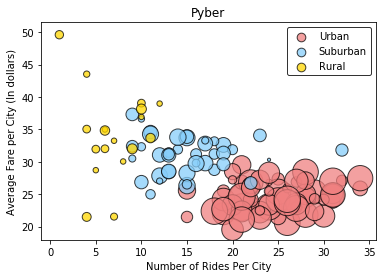

In [3]:
# Bubble Plot

# Group by city name
city_name = merge_data.groupby('city')

# Average fare by city
average_fare = city_name.mean()['fare']

# Rides by city
ride_by_city = city_name['ride_id'].count()

# Number of drivers
number_of_drivers = city_name.mean()['driver_count']

# City Type (Urban, Suburban, Rural)
city_type = city.set_index('city')['type']

# Create a dataframe
city_info = pd.DataFrame({
    "Number of Rides": ride_by_city,
    "Average Fare": average_fare,
    "Number of Drivers": number_of_drivers,
    "City Type": city_type
})

city_info.sort_values('Number of Drivers', ascending = False)

# Sort the data based on city type
urban = city_info[city_info["City Type"] == 'Urban']
suburban = city_info[city_info["City Type"] == 'Suburban']
rural = city_info[city_info["City Type"] == 'Rural']

# Colors for the Bubble Plot
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}

city_color = {'Urban': color_scheme['Light Coral'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Gold']}



# Create the three sets of data for the graph
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)

# Print the graph
plt.title('Pyber')
plt.xlabel('Number of Rides Per City')
plt.ylabel('Average Fare per City (In dollars)')



lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()

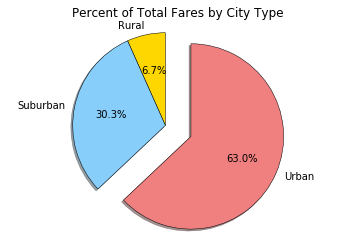

In [4]:
# Percent of Total Fares by City Type

# Group the data by type
by_type = merge_data.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

# Total fare by city
fare_sum = by_type.sum()['fare']

# Begin the pie chart
labels = fare_sum.index

# Establish the colors
colors = [city_color[n] for n in labels]
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

# Print the Pie Chart
plt.title('Percent of Total Fares by City Type')
plt.axis('equal')
plt.show()

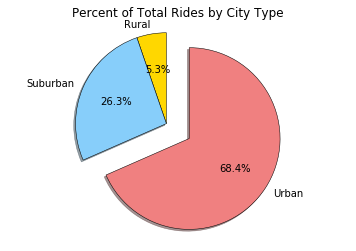

In [5]:
# Percent of Total Rides by City Type 

ride_sum = by_type.count()['ride_id']

labels = ride_sum.index
plt.pie(ride_sum, startangle = 90, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('Percent of Total Rides by City Type')
plt.axis('equal')
plt.show()

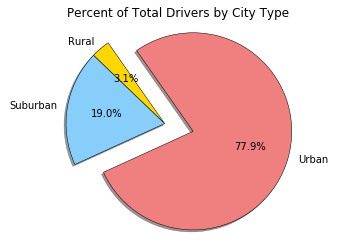

In [6]:
# Percent of Total Drivers by City Type

driver_sum = city.groupby('type').sum()['driver_count']

labels = driver_sum.index
plt.pie(driver_sum, startangle = 125, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('Percent of Total Drivers by City Type')
plt.axis('equal')
plt.show()